# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [357]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [358]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [359]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,822,95,41,82,170,65,9,145,46,19,145,163,314,140,64,4,8,199,207
1,486,104,57,103,222,72,12,221,30,25,177,223,718,218,72,11,12,186,195
2,182,91,42,66,169,66,7,145,44,19,140,169,325,159,67,4,0,201,207
3,375,109,52,95,189,58,4,227,29,25,158,262,776,217,82,0,19,187,186
4,528,95,47,73,195,70,7,167,38,20,152,184,430,185,69,9,19,200,206
5,223,81,44,72,139,60,6,153,44,19,146,180,347,178,81,1,15,182,186
6,840,93,34,66,140,56,7,130,51,18,120,151,251,114,62,5,29,201,207
7,593,89,43,77,147,54,8,144,46,19,146,163,308,174,64,13,5,194,201
8,346,117,52,110,228,65,12,212,31,24,163,228,668,220,66,21,25,194,205
9,357,109,49,109,193,59,10,207,32,24,156,225,635,213,70,13,31,191,202


Methods `describe` and `info` deliver some useful information.

In [360]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,425.723133,93.520947,44.675774,81.801457,168.204007,61.644809,8.457195,167.327869,41.273224,20.468124,147.438980,186.734062,431.540984,173.763206,72.158470,6.522769,12.646630,188.998179,195.854281
std,242.288797,8.063277,6.154680,15.928751,33.047995,7.110666,3.945857,32.506680,7.777590,2.526030,14.631309,30.436279,171.479332,31.793047,7.335198,4.980796,8.833356,6.298389,7.449629
min,0.000000,76.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,217.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,34.000000,19.000000,136.000000,167.000000,317.000000,148.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,430.000000,93.000000,44.000000,79.000000,165.000000,61.000000,8.000000,157.000000,43.000000,20.000000,145.000000,177.000000,363.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,636.000000,99.000000,49.000000,98.000000,195.000000,66.000000,10.000000,196.000000,46.000000,23.000000,159.000000,216.000000,576.000000,196.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,117.000000,59.000000,110.000000,306.000000,126.000000,52.000000,265.000000,59.000000,29.000000,186.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,40.000000,206.000000,211.000000


In [361]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

Отметим как факт, что данные не содержат нулей. Произведем нормализацию данных.
Также применим метод PowerTransformer, он автоматически стандартизирует данные после преобразования, то есть каждая переменная будет иметь нулевое среднее значение и единичную дисперсию.

In [362]:
### YOUR CODE HERE
import sklearn.preprocessing as preprocessing

In [363]:
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pt = preprocessing.PowerTransformer()
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

In [364]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02
mean,1.423674e-16,-2.758368e-16,5.613805e-16,1.682524e-16,1.132468e-16,-5.180232e-15,-7.267208e-15,-5.079928e-16,-4.931089e-15,4.604291e-15,-3.873445e-15,1.119525e-15,2.070799e-16,-2.436424e-15,-2.387890e-15,2.096683e-15,-2.640268e-15,-2.368476e-15,-3.423289e-15
std,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00
min,-1.799185e+00,-2.776093e+00,-2.226395e+00,-2.796308e+00,-2.164011e+00,-3.234496e+00,-4.037496e+00,-2.215868e+00,-2.048139e+00,-1.902989e+00,-2.316754e+00,-2.373077e+00,-2.068008e+00,-2.188653e+00,-2.865503e+00,-1.612701e+00,-1.792416e+00,-2.306110e+00,-1.854303e+00
25%,-8.558010e-01,-7.897086e-01,-7.282470e-01,-7.212282e-01,-8.412706e-01,-6.894845e-01,-4.370217e-01,-5.919218e-01,-9.315303e-01,-4.821091e-01,-7.578467e-01,-5.926520e-01,-6.116843e-01,-7.921955e-01,-7.358112e-01,-9.509612e-01,-7.211258e-01,-7.747045e-01,-6.943432e-01
50%,3.559947e-02,3.990766e-02,-2.166691e-02,-1.328905e-01,-3.570702e-02,3.962649e-02,2.906957e-02,-1.716564e-01,2.457504e-01,2.842344e-02,-9.528874e-02,-2.064070e-01,-2.231491e-01,4.258712e-02,5.434060e-03,7.185575e-02,-2.741621e-02,5.771789e-02,1.022230e-01
75%,8.715231e-01,7.464892e-01,7.519167e-01,1.017254e+00,8.354418e-01,7.900663e-01,7.957290e-01,9.633747e-01,6.230188e-01,1.090172e+00,8.216694e-01,1.004851e+00,9.962904e-01,7.361685e-01,5.999689e-01,8.237448e-01,8.298636e-01,6.705633e-01,6.728783e-01
max,1.697696e+00,2.365755e+00,2.033802e+00,1.690267e+00,3.426041e+00,4.120643e+00,3.738526e+00,2.182426e+00,2.186784e+00,2.159888e+00,2.302297e+00,2.473757e+00,2.112848e+00,2.570508e+00,3.251855e+00,2.216264e+00,2.240775e+00,2.414742e+00,2.231742e+00


In [365]:
pd.DataFrame(X_test).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,-0.038830,0.043206,0.086604,0.053936,0.061430,-0.029228,0.005497,0.123295,-0.125582,0.117614,0.114334,0.167565,0.124529,0.076640,0.121050,-0.078687,-0.025657,-0.022787,-0.086378
std,1.026827,1.067229,0.996440,0.971384,1.012221,1.066774,1.034043,1.021869,1.016512,1.019958,0.958673,1.019259,1.023863,1.055254,1.023646,0.973317,1.025991,0.937897,0.994696
min,-1.790299,-3.465623,-2.226395,-2.962671,-2.124181,-3.234496,-3.098363,-2.343760,-2.048139,-1.902989,-2.220024,-2.433797,-2.171210,-2.317981,-2.537914,-1.612701,-1.792416,-2.306110,-1.854303
25%,-0.889896,-0.641404,-0.728247,-0.721228,-0.773779,-0.689485,-0.437022,-0.511304,-1.203744,-0.482109,-0.604907,-0.552303,-0.557507,-0.721856,-0.534443,-0.950961,-0.879106,-0.601620,-0.943506
50%,-0.038591,0.039908,0.141894,-0.006270,0.116179,0.039626,0.029070,-0.136099,0.118432,0.028423,0.043542,-0.061982,-0.199823,0.074113,0.166305,-0.153523,-0.027416,-0.102451,-0.035553
75%,0.839484,0.959672,0.894470,1.017254,0.835442,0.652342,0.795729,1.123442,0.623019,1.090172,0.943108,1.082606,1.171797,0.850535,0.853259,0.655194,0.736109,0.670563,0.527310
max,1.685977,2.511807,1.918361,1.798952,3.947719,4.323757,3.754420,2.073915,2.418400,2.036725,2.400163,2.936622,2.034478,2.479336,3.364629,2.216264,2.289098,2.167079,2.067592


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [366]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [367]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.5, 1, 3, 5, 7],
    'max_iter': [500],
    'solver' : ['saga']
}

log_reg = LogisticRegression(multi_class='multinomial', tol=1e-3)

clf = GridSearchCV(log_reg, param_grid)

clf.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(multi_class='multinomial', tol=0.001),
             param_grid={'C': [0.5, 1, 3, 5, 7], 'max_iter': [500],
                         'penalty': ['l1', 'l2'], 'solver': ['saga']})

In [368]:
print(clf)

GridSearchCV(estimator=LogisticRegression(multi_class='multinomial', tol=0.001),
             param_grid={'C': [0.5, 1, 3, 5, 7], 'max_iter': [500],
                         'penalty': ['l1', 'l2'], 'solver': ['saga']})


In [369]:
print(clf.best_params_)

{'C': 3, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}


In [370]:
clf.best_score_

0.779649708090075

In [371]:
clf.best_estimator_

LogisticRegression(C=3, max_iter=500, multi_class='multinomial', solver='saga',
                   tol=0.001)

In [372]:
pred = clf.predict(X_test)
print('f1_macro score: ', f1_score(y_test,pred,average = 'macro'))
print('accuracy score: ', accuracy_score(y_test,pred,normalize=True))

f1_macro score:  0.7909630978770779
accuracy score:  0.797979797979798


In [374]:
print('f1_none score: ', f1_score(y_test,pred,average = None))

f1_none score:  [0.91011236 0.65714286 0.63309353 0.96350365]


Выводы:

Для подбора наилучших гиперпараметров логистической регрессии использовали класс GridSearchCV из библиотеки Sklearn.
В частности применили

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.5, 1, 3, 5, 7],
    'max_iter': [500],
    'solver' : ['saga']
}

где *penalty* - это наши нормы штрафа ‘l1’ и ‘l2’
параметр *C* - это параметр(коэффициент) регуляризации, используемым для перекрестной проверки
*max_iter* - подбор максимального кол-во итераций
*tol* - необходимая точность равная 1e-3,
*solver* - тип солвера, в данном случае предложено выбрать стохастический алгоритм saga с поддержкой l1

В результате получили лучшее решение в виде следующих параметров:
{'C': 3, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}

Также посчитали оценку точности по двум метрикам: accuracy и f1(f1_macro) и получили следующие значения:
*f1_macro score:*  0.7909630978770779
*accuracy score:*  0.797979797979798

В целом значения очень похожи и различие начинается в тысячных долях.
Также если для f1 указать тип average как None, то метрика вернет точность по каждому классу:

*f1_none score:*  [0.91011236 0.65714286 0.63309353 0.96350365]
Точность по 1 и 4 типам очень высокая, тогда как по 2 и 3 падает.


In [193]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

In [375]:
import scikitplot

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

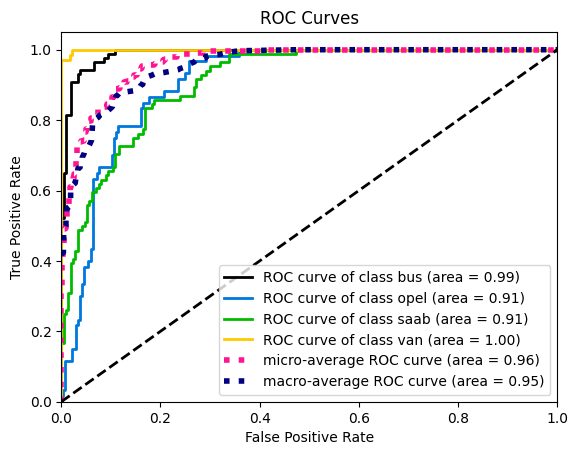

In [376]:
scikitplot.metrics.plot_roc(y_test, clf.best_estimator_.predict_proba(X_test))

На графике выше кривая ROC показывает качество определение наших классов. В частности видно, что классы 'bus' и 'van' определяются с очень высокой точностью, тогда как классы 'opel' и 'saab' определяются с более низкой точностью.

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [377]:
### YOUR CODE HERE
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

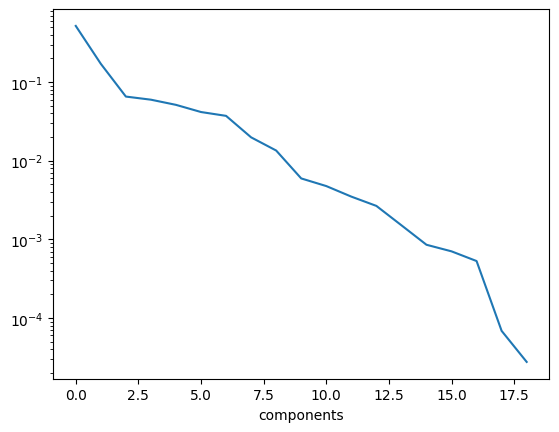

In [378]:
pca = PCA(svd_solver='full')
pca.fit(X_train)
exp_var_pca = pca.explained_variance_ratio_
plt.plot(exp_var_pca)
plt.xlabel('components')
plt.yscale('log')
plt.show()

In [379]:
# print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[73.59649245 42.24718761 26.14764696 24.98147288 23.15892855 20.84983369
 19.71139989 14.38911453 11.86280125  7.88252976  7.04871483  6.03916787
  5.27132562  3.96873467  2.98344496  2.70914604  2.35035404  0.84522236
  0.53628599]


exp_var_pca - Доля от общей дисперсии

Далее построили логарифмический график на котором отображено, что первые 1-2 компоненты имеют максимальную эффективность и имеют самые высокие сингулярные значения(73.59649245 и 42.24718761), а значит они вносят самый больше вклад в сохранение информации в матрице и соответвенно вносят наибольший вклад в точность модели.

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

В соответствии с выше представленным графиком дисперсии выберем 7 главных компонентов, тк они представляют самыю высокую значимость и соответственно имеют самые высокие сингулярные значения. Кол-во компонент можно было увеличить, например, до 9, но на точность сильно это не повлияет, но увеличит кол-во расчетов и усложнит модель.

In [380]:
### YOUR CODE HERE
pca = PCA(n_components=7, svd_solver='full')
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [381]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 0.3, 0.5, 1, 3],
    'solver' : ['saga']
}

log_reg = LogisticRegression(multi_class='multinomial', tol=1e-3, max_iter=500)

clf = GridSearchCV(log_reg, param_grid)

clf.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          tol=0.001),
             param_grid={'C': [0.1, 0.3, 0.5, 1, 3], 'penalty': ['l1', 'l2'],
                         'solver': ['saga']})

In [382]:
print(clf.best_params_)

{'C': 0.3, 'penalty': 'l1', 'solver': 'saga'}


In [383]:
pred = clf.predict(X_test)
print('f1_macro score: ', f1_score(y_test,pred,average = 'macro'))
print('accuracy score: ', accuracy_score(y_test,pred,normalize=True))

f1_macro score:  0.6221779090751451
accuracy score:  0.6430976430976431


In [384]:
print('f1_none score: ', f1_score(y_test,pred,average = None))

f1_none score:  [0.75977654 0.5034965  0.38333333 0.84210526]


После новых расчетов лучшие параметры изменились:

{'C': 0.3, 'penalty': 'l1', 'solver': 'saga'}

Коэффициент регуляризации уменьшился до 0.3 и штрафная функция поменялась на l1
Также видим изменения по точности, она снизилась примерно на 15%, но матрица в размерах сократилась более чем в 2 раза
Построим график кривой ROC

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

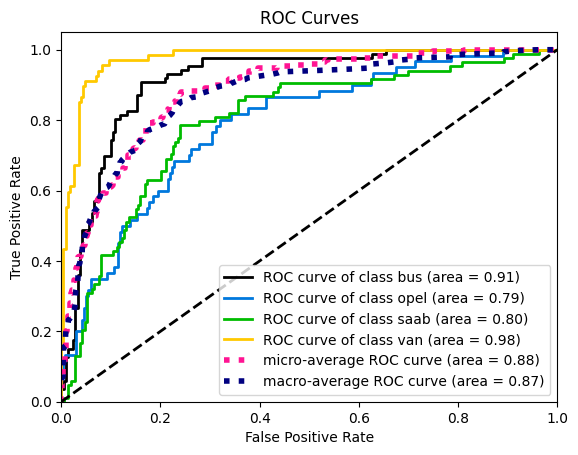

In [385]:
scikitplot.metrics.plot_roc(y_test, clf.best_estimator_.predict_proba(X_test))

По кривой ROC видно, что качество прогнозирования упало, особенно это видно для класса Bus. Как вариант, можно использовать больше компонентов в PCA, не так сильно урезая матрицу.

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [386]:
from sklearn.tree import DecisionTreeClassifier
# YOUR CODE HERE
tree = DecisionTreeClassifier()

param_grid = {
    'criterion':
        [
            'gini', 'entropy', 'log_loss'
        ],
    'max_depth': [
        10, 20, 30, 40, 50, 60, 70, 80, 90, 100
    ]
}

clf = GridSearchCV(tree, param_grid)

clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                       100]})

In [387]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 40}

In [388]:
clf.best_score_

0.6412677231025855

In [389]:
pred = clf.predict(X_test)
print('f1_macro score: ', f1_score(y_test,pred,average = 'macro'))
print('accuracy score: ', accuracy_score(y_test, pred))

f1_macro score:  0.577357902545218
accuracy score:  0.5959595959595959


In [261]:
print('f1_none score: ', f1_score(y_test,pred,average = None))

f1_none score:  [0.82485876 0.4137931  0.3943662  0.72307692]


В результате получили лучшее решение в виде следующих параметров:
{'criterion': 'gini', 'max_depth': 40}

Также посчитали оценку точности по двум метрикам: accuracy и f1(f1_macro) и получили следующие значения:
*f1_macro score:*  0.577357902545218
*accuracy score:*  0.5959595959595959

В целом значения очень похожи и различие начинается в сотых долях.
Также если для f1 указать тип average как None, то метрика вернет точность по каждому классу:

*f1_none score:*  [0.82485876 0.4137931  0.3943662  0.72307692]
Точность по 1 и 4 типам в целом высокая, тогда как по 2 и 3 сильно падает.
Если сравнивать с логистической регрессией, то она дает показатели выше, чем дерево решений

Построим график и пронаблюдаем данный факт:

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

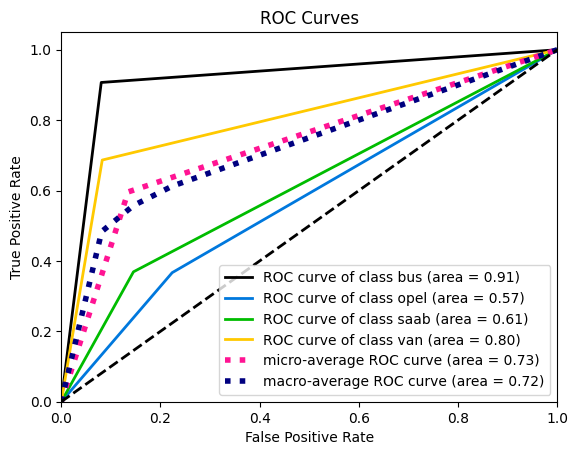

In [390]:
scikitplot.metrics.plot_roc(y_test, clf.best_estimator_.predict_proba(X_test))

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [391]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier

Создадим функцию с определением BaggingClassifier для нашего ансамбля

In [392]:
def bag_clas(n, params):
    clf = BaggingClassifier(n_estimators=n, **params)
    clf.fit(X_train, y_train)
    return clf.predict(X_test)

Реализуем проход по "$N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5)" с помощью GridSearchCV и получим метрики для построения и анализа графиков

In [393]:
N = range(2,100,5)
n = len(range(2,100,5))

In [394]:
[_ for _ in range(2,100,5)]

[2, 7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77, 82, 87, 92, 97]

In [399]:
log_reg = LogisticRegression(multi_class='multinomial', penalty='l1', C=0.3, solver='saga', tol=1e-3, max_iter=500)
des_tree = DecisionTreeClassifier(max_depth=100)

param_grid = {'n_estimators': [_ for _ in range(2,100,5)],
              'estimator': [log_reg, des_tree]}

bag_cl = BaggingClassifier()
clf = GridSearchCV(bag_cl, param_grid, scoring=['f1_macro', 'accuracy'], refit='f1_macro')
clf.fit(X_train, y_train)

GridSearchCV(estimator=BaggingClassifier(),
             param_grid={'estimator': [LogisticRegression(C=0.3, max_iter=500,
                                                          multi_class='multinomial',
                                                          penalty='l1',
                                                          solver='saga',
                                                          tol=0.001),
                                       DecisionTreeClassifier(max_depth=100)],
                         'n_estimators': [2, 7, 12, 17, 22, 27, 32, 37, 42, 47,
                                          52, 57, 62, 67, 72, 77, 82, 87, 92,
                                          97]},
             refit='f1_macro', scoring=['f1_macro', 'accuracy'])

Text(0, 0.5, 'Metrics')

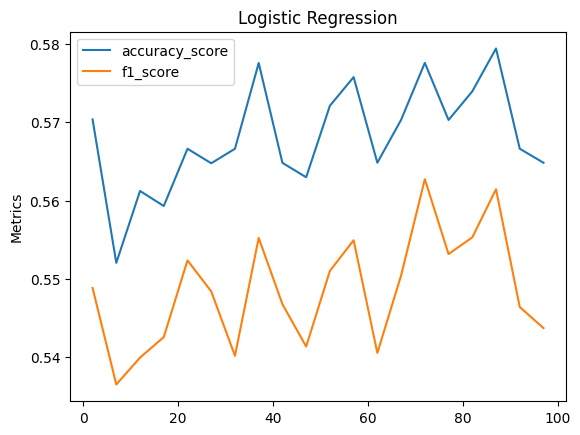

In [400]:
metric_acc = clf.cv_results_['mean_test_accuracy'][:n]
metric_f1 = clf.cv_results_['mean_test_f1_macro'][:n]

plt.plot(N, metric_acc, label = 'accuracy_score')
plt.plot(N, metric_f1, label = 'f1_score')
plt.legend()
plt.title('Logistic Regression')
plt.xlabel('')
plt.ylabel('Metrics')

*Logistic Regression*
При использовании ансамблей с логистичесой регрессией точность решения не сильно возрастает и вполне может показать худшие результаты, чем при единичном обучении.
Также график показывает сильные скачки при увеличении кол-ва ансамблей, что в целом приводит к выводу, что дальнейшее увеличение не приведет к какому-то значимому результату и даже может его сильно ухудшить.

Text(0, 0.5, 'Metrics')

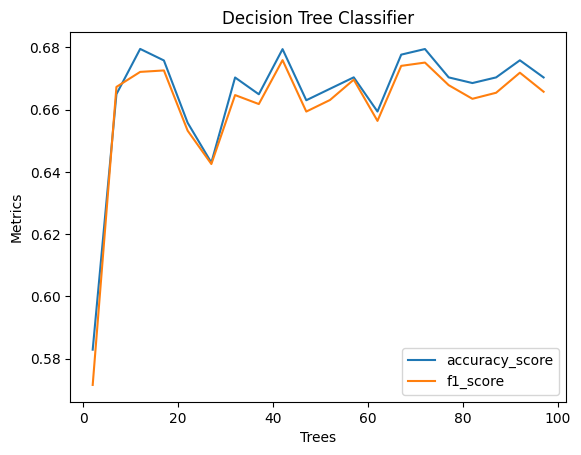

In [401]:
metric_acc = clf.cv_results_['mean_test_accuracy'][n:]
metric_f1 = clf.cv_results_['mean_test_f1_macro'][n:]

plt.plot(N, metric_acc, label = 'accuracy_score')
plt.plot(N, metric_f1, label = 'f1_score')
plt.legend()
plt.title('Decision Tree Classifier')
plt.xlabel('Trees')
plt.ylabel('Metrics')

*Decision Tree*
При использовании ансамбля точность уже при количестве деревьев 15 выше, чем точность при использовании одного дерева и близка к максимальной. Примерно при 75 деревьев наблюдается пик возможной точности, но затраты на ресурсы вряд ли компенсируют такое незначительное увеличение точности.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [402]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [_ for _ in range(2,100,5)]}

random_forest = RandomForestClassifier()
clf = GridSearchCV(random_forest, param_grid = param_grid, scoring=['f1_macro', 'accuracy'], refit=False)

clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [2, 7, 12, 17, 22, 27, 32, 37, 42, 47,
                                          52, 57, 62, 67, 72, 77, 82, 87, 92,
                                          97]},
             refit=False, scoring=['f1_macro', 'accuracy'])

Text(0, 0.5, 'Metrics')

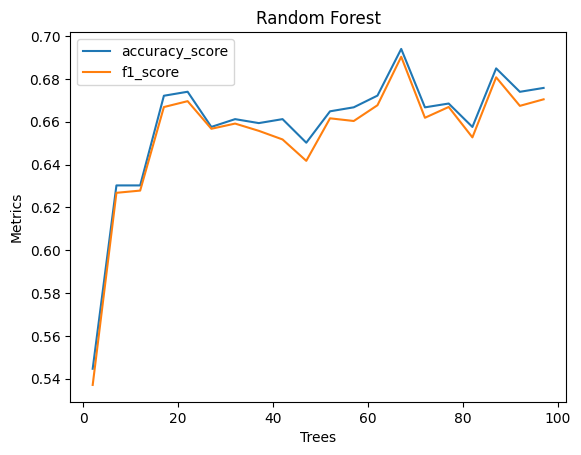

In [403]:
metric_acc = clf.cv_results_['mean_test_accuracy']
metric_f1 = clf.cv_results_['mean_test_f1_macro']

plt.plot(N, metric_acc, label = 'accuracy_score')
plt.plot(N, metric_f1, label = 'f1_score')
plt.legend()
plt.title('Random Forest')
plt.xlabel('Trees')
plt.ylabel('Metrics')

In [404]:
random_forest_best = N[metric_acc.argmax()]
random_forest_best

67

Random Forest в целом показывает схожую точность с ансамблем в районе 0.68-0.7 значений и не сильно на текущих данных отличается от ансамбля.
При этом можно в плюс Random Forest отнести более быстрое нахождение пика точности в отличие от ансамбля.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [405]:
# YOUR CODE HERE
from sklearn.metrics import f1_score, accuracy_score

In [407]:
X_train.shape

(549, 7)

In [408]:
parts = np.linspace(0, X_train.shape[0], 11).astype('int64')

log_reg_metric_accuracy = []
log_reg_metric_f1 = []

tree_metric_accuracy = []
tree_metric_f1 = []

random_forest_metric_accuracy = []
random_forest_metric_f1 = []


for i, part in enumerate(parts):
    if part == 0:
        continue
    # results['num_parts'].append(i)

    log_reg_params = {'C': 3, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}
    log_reg = LogisticRegression(multi_class='multinomial', tol=1e-3, **log_reg_params)

    tree_params = {'criterion': 'entropy', 'max_depth': 60}
    tree = DecisionTreeClassifier(**tree_params)

    random_forest = RandomForestClassifier(n_estimators=random_forest_best)

    X_train_part = X_train[0:part]
    y_train_part = y_train[0:part]

    log_reg.fit(X_train_part, y_train_part)
    tree.fit(X_train_part, y_train_part)
    random_forest.fit(X_train_part, y_train_part)

    #LogisticRegression
    log_reg_pred = log_reg.predict(X_test)
    log_reg_metric_accuracy.append(accuracy_score(y_test, log_reg_pred))
    log_reg_metric_f1.append(f1_score(y_test, log_reg_pred, average='macro'))

    #DecisionTreeClassifier
    tree_pred = tree.predict(X_test)
    tree_metric_accuracy.append(accuracy_score(y_test, tree_pred))
    tree_metric_f1.append(f1_score(y_test, tree_pred, average='macro'))

    #RandomForestClassifier
    random_forest_pred = random_forest.predict(X_test)
    random_forest_metric_accuracy.append(accuracy_score(y_test, random_forest_pred))
    random_forest_metric_f1.append(f1_score(y_test, random_forest_pred, average='macro'))

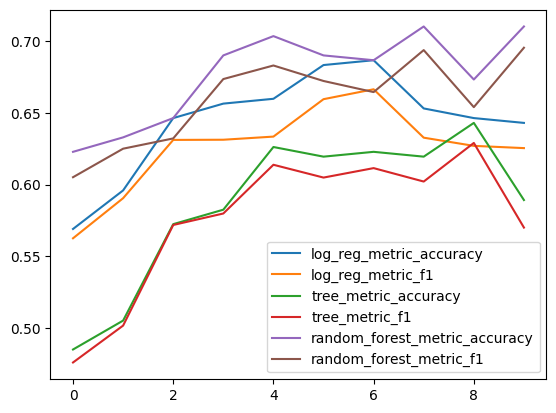

In [409]:
N = [_ for _ in range(len(parts)-1)]

plt.plot(N, log_reg_metric_accuracy, label='log_reg_metric_accuracy')
plt.plot(N, log_reg_metric_f1, label='log_reg_metric_f1')

plt.plot(N, tree_metric_accuracy, label='tree_metric_accuracy')
plt.plot(N, tree_metric_f1, label='tree_metric_f1')

plt.plot(N, random_forest_metric_accuracy, label='random_forest_metric_accuracy')
plt.plot(N, random_forest_metric_f1, label='random_forest_metric_f1')

plt.legend()

Увеличение количества семплов неплохо увеличивает общие показатели по всем алгоритмам, но также присутствуют и провалы, в частности для деревьев и регрессии. Это может быть следствием качества самих данных. С другой стороны семплирование очень хорошо работает с рандомными деревьями, показывая неплохое повышение точности.

В целом по работе можно сформировать следующие выводы:

1. В работе использовали GridSearchCV для подбора лучших гиперпараметров с использование кросс-валидации. GridSearchCV неплохо справляется со своим назначением и помогал подбирать оптимальные параметры для каждого использованного алгоритма модели.
2. Также строили ROC кривую для оценки качества определения наших классов, по которой можно было определить точность наглядным образом. Особенно когда упала точность по 'bus' после урезания матрицы в задаче 2.4.
3. В работе считали разные метрики, а именно accuracy и f1. Метрика f1 - определяется как f1 = 2 * (precision * recall) / (precision + recall) и мы можем ее использовать с разными параметрами, например, по среднему невзвешенному значению или по каждому классу в отдельности.  accuracy вычисляется по формуле $acc = \frac{TP + TN}{TP + TN + FP + FN}$ и определяет долю правильных ответов.
4. Также выяснили, что Random Forest показывает более высокую точность, чем ансамбли деревьев. Но ансамбль деревьев лучше одного дерева DecisionTree